In [1]:
# !pip install anndata
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 96 kB 4.9 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 9.4 MB 50.1 MB/s 
     |████████████████████████████████| 965 kB 51.4 MB/s 
     |████████████████████████████████| 295 kB 49.0 MB/s 
     |████████████████████████████████| 1.1 MB 48.0 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=69fc6461de9892b97ef7223a1953a789697e91f34823c373072f546e20f83c1a
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=7055591c5dfc8da40985b4d22e840de976c142f489ae584e48ad9143132c126b
  Stored in directo

In [2]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/sad2/projekt/SAD2022Z"
train = path + "/SAD2022Z_Project1_GEX_train.h5ad"
test = path + "/SAD2022Z_Project1_GEX_test.h5ad"

In [5]:
import scanpy as sc

In [6]:
train_adata = sc.read_h5ad(train)
test_adata = sc.read_h5ad(test)

# **1.a**

## Dane trenujące mają 72208 obserwacji oraz 5000 zmiennych.

## Dane testujące mają 18052 obserwacji oraz 5000 zmiennych.

In [7]:
print("Train")
print(train_adata)
print("Test")
print(test_adata)

Train
AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'
Test
AnnData object with n_obs × n_vars = 18052 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorB

# **1.b**

In [8]:
import matplotlib.pyplot as plt

def joined_hist_plot(a, b, name):
    fig, ax = plt.subplots(2, figsize=(6, 6))

    fig.tight_layout(pad=2.5)

    ax[0].hist(a)
    ax[0].set_title("preprocessed")
    ax[1].hist(b)
    ax[1].set_title("raw")

    ax[1].set_xlabel('value')
    plt.savefig(name)
    plt.show()   

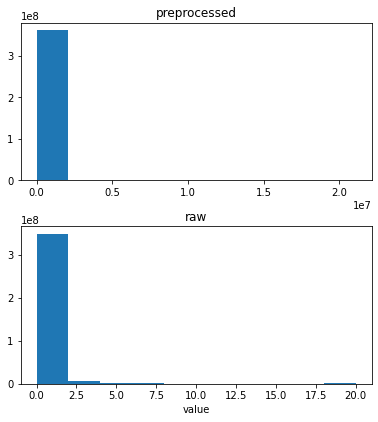

In [9]:
flat_train = train_adata.X.toarray().reshape(-1, 1)
falt_train_raw = train_adata.layers["counts"].toarray().reshape(-1, 1).clip(0,20)

joined_hist_plot(flat_train, falt_train_raw, "1_b.png")

# 1.**c**

- Has the data beeen normalized to 10k reads? NIE, bo jest napisane "Counts were then normalized per cell by divided the UMI counts by the size factors" nie było nigdzie nic napisane o 10k reads
- Has it been log1p transformed? TAK, "Finally, normalized counts are log1p transformed"
- has it been scaled to unit variance? chyba NIE, nie znalazłem informacji na ten temat.



# 1.**d**

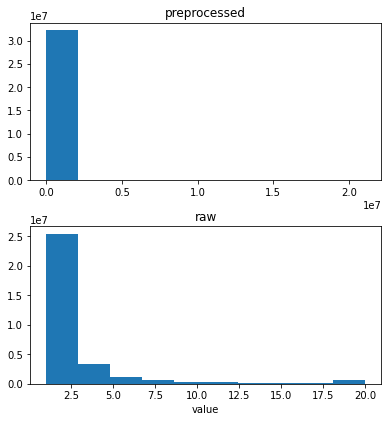

In [10]:
nonzero_flat_train = flat_train[flat_train != 0]
nonzero_falt_train_raw = falt_train_raw[falt_train_raw != 0]

joined_hist_plot(nonzero_flat_train, nonzero_falt_train_raw, "1_d.png")

# 1.**e**

Brak zer wpływa na to, że pierwszy bar będzie niższy, tym samym sprawi to, że inne bar'y będą wyższe i lepiej zauważalne.

Dzięki temu zabiegowi łatwiej będzie nam stwierdzić rzeczywisty rozkład danych.

Co prawda od strony biologicznej zera mogą być interpretowane jako brak albo mała wartość ekspresji genów, więc teoretycznie nie powinno się ich odrzuczać.
Ale zera mogą też oznaczać brakujące dane. Więc nasze podejście zależy od poziomu naszej wiary w rzetelność danych.

Na oko rozkład zdaje się przypominać exponential distribution z większą wartością rates.

Ew. negative binomial albo poisson.


# 1.**f**

W tym df'ie mamy dodatkowe dane o naszych danych.
Są przykładowo informacje o tym czy dawca był palaczem, jaki miał typ krwi, płeć, etniczność. 

In [11]:
import pandas as pd

In [12]:
df = train_adata.obs
df.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

In [13]:
patient_amount = len(df)
lab_amount = len(df.groupby("Site").size())
cell_type_amount = len(df.groupby("cell_type").size())

print(f"patient_amount: {patient_amount}")
print(f"lab_amount: {lab_amount}")
print(f"ncell_type_amount: {cell_type_amount}")

patient_amount: 72208
lab_amount: 4
ncell_type_amount: 45
